# Medical Cost Personal Insurance Datasets



Problem Statement:



Insurance Forecast by using Linear Regression




Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .




Columns                                            

·  age: age of primary beneficiary

· sex: insurance contractor gender, female, male

· bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

· children: Number of children covered by health insurance / Number of dependents

· smoker: Smoking

· region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

· charges: Individual medical costs billed by health insurance




Predict : Charges  Can you accurately predict insurance costs?





Dataset Link - https://github.com/dsrscientist/dataset4/blob/main/medical_cost_insurance.csv

For more information about algorithm
Follow this -> https://scikit-learn.org/stable/index.html

In [1]:
#Lets import necessary Libraries.
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#Lets check the shape of dataset
data.shape

(1338, 7)

So , here we have 1338 rows and 7 columns

# Data is Duplicated ?


In [4]:
data.duplicated().sum()

1

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
#Lets check again the shape of dataset
data.shape

(1337, 7)

In [7]:
#Lets check the data type of dataset
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

 So ,Here we have we have .

int type  - 2 columns ( Age , Children)

Object type - 3 columns ( Sex, Smoker , Region)

Float Type - 2 columns (BMI ,charges)



Our target column is float type that is Charges. and we consider 99% of times float data has a continious data . so in this we have 2 continious data in pour dataset.

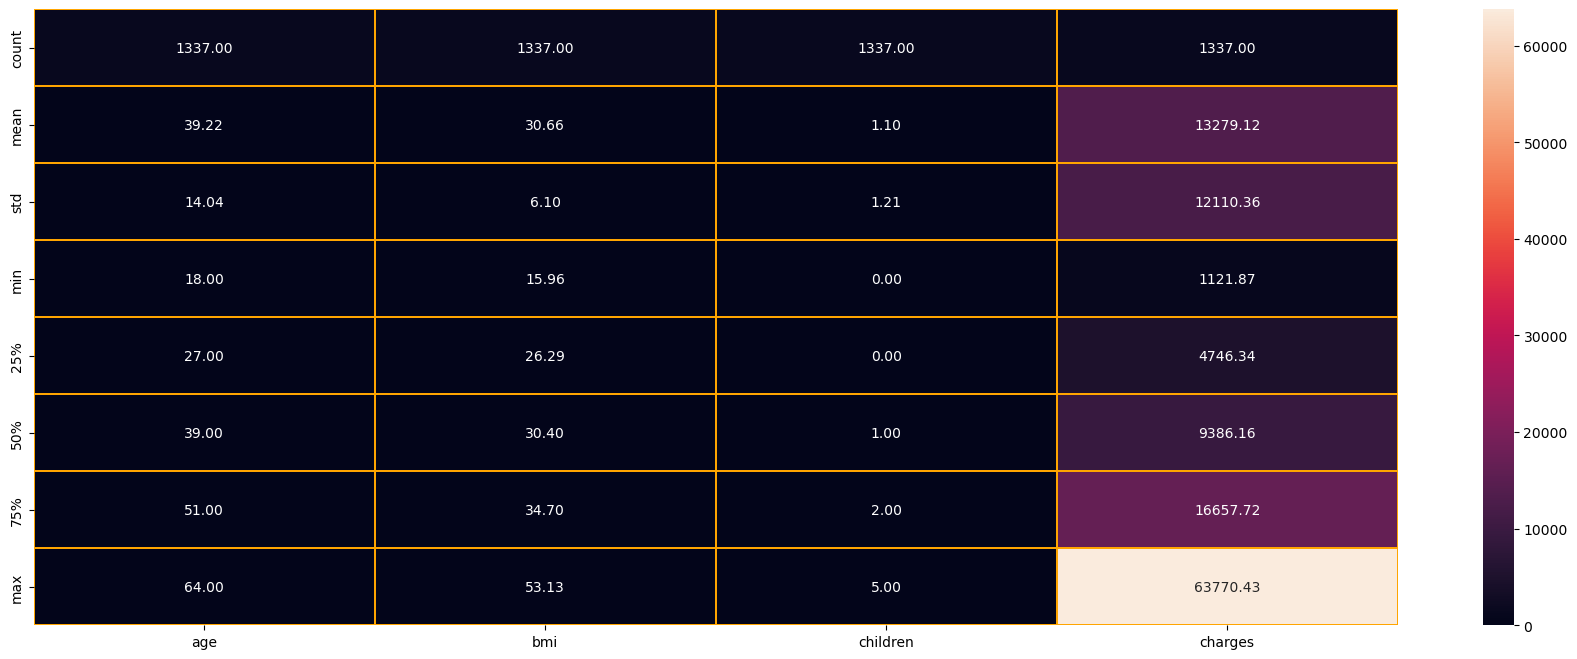

In [8]:
#Lets Discribe the dataset using heatmap
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(22,8))
sns.heatmap(data.describe(),annot=True,linewidths=0.3,linecolor='orange',fmt="0.2f")
plt.show()

# Observations
- No Missing Values


- Outliers in BMI.


We are good to proceed.

#  EDA (Exploratory data analysis)

- Basic Analysis with Visualisation

In [9]:
#Lets plot relplot(Relational Plot)
import seaborn as sns # Importing Visualisation library (Seaborn and Matplotlib)
import matplotlib.pyplot as plt

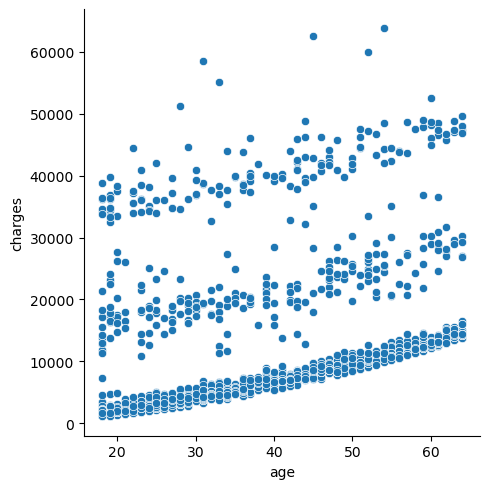

In [10]:
#Lets plot age
sns.relplot(x='age',y='charges',data=data,kind='scatter')
plt.show()

So , Here we can see the . there are  some positive relationship.

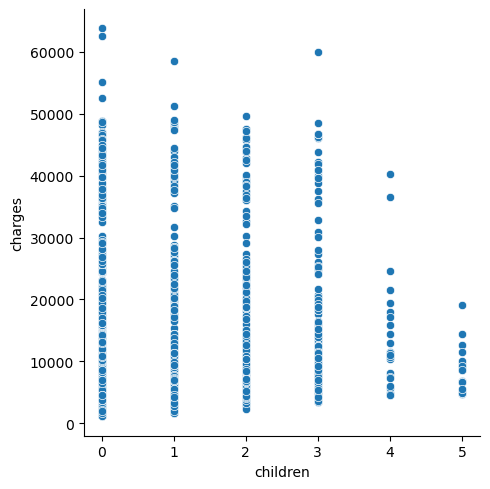

In [11]:
#Lets plot children columns
sns.relplot(x='children',y='charges',data=data,kind='scatter')
plt.show()

As the number of children increase the charges decrease ,We can clearly see that there is no relationship. in children and charges column 


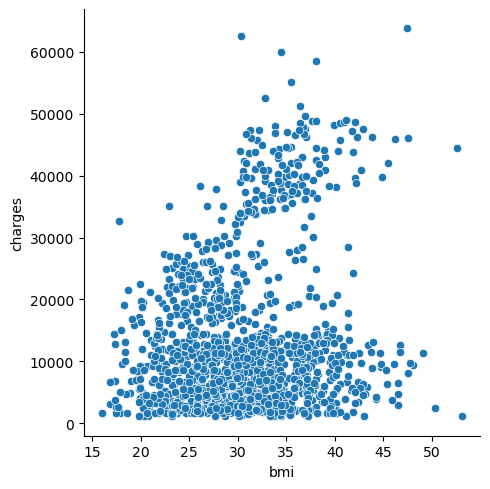

In [12]:
#Lets plot BMI
sns.relplot(x='bmi',y='charges',data=data,kind='scatter')
plt.show()

We can see that . BMI and Charges has no  relationship..

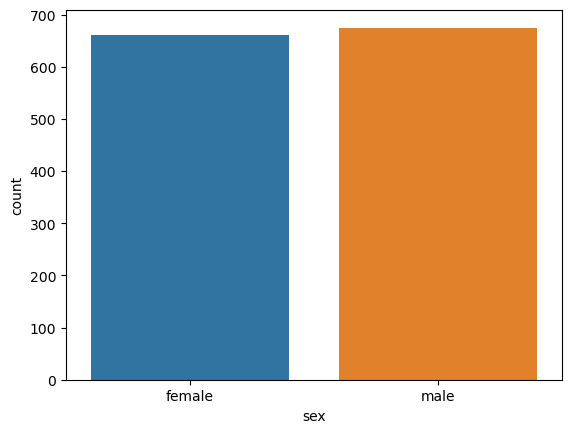

male      675
female    662
Name: sex, dtype: int64

In [13]:
#Lets plot sex data .Using count plot
sns.countplot(x='sex',data=data)
plt.show()
data['sex'].value_counts()

So , in sex column we have Male - 675 and Female - 662

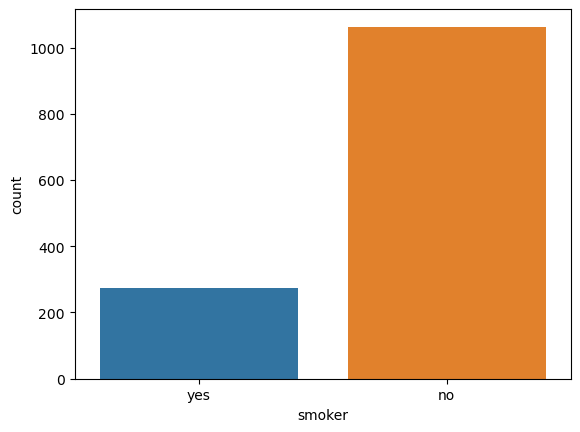

no     1063
yes     274
Name: smoker, dtype: int64

In [14]:
#Lets plot smoker . using count plot.
sns.countplot(x='smoker',data=data)
plt.show()
data['smoker'].value_counts()

So ,here we have 274 person who are smoking and 1063 person who are not smoking.

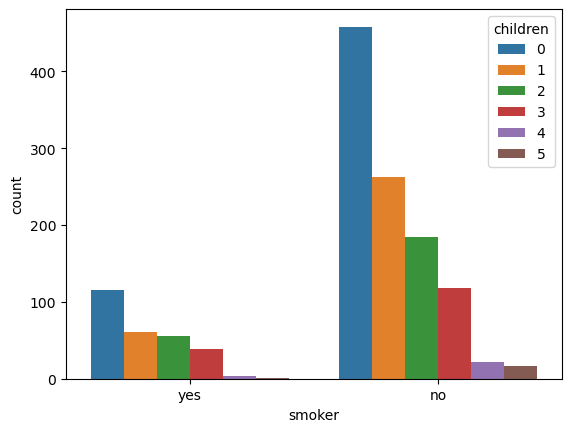

In [15]:
#Lets check how much  are smoking who have dependents
sns.countplot(x='smoker',data=data,hue='children',)
plt.show()

- So who have 0 Dependents - More then 100 peoples are smoking

- So Who have 1 Dependents - More then 60 People are somking


- So Who have 2 Dependents - More then 50 People are smoking


- So Who have 3 Dependents - Almost 50 people are somking


- So Who have 4 Dependents - Almost 4 - 6 People are Smoking


- So who have 5 Dependents - Almost 1-2 People are Smoking

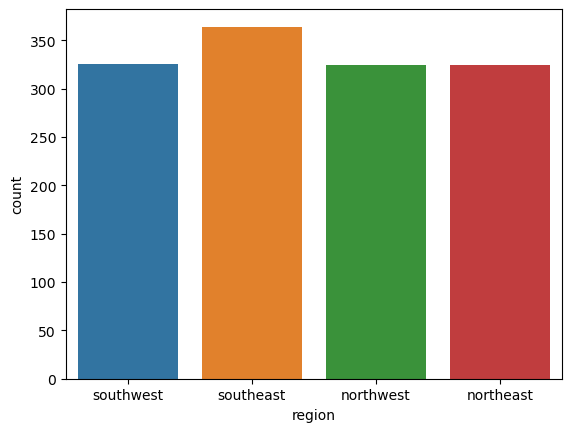

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [16]:
#Lets plot region 
sns.countplot(x='region',data=data)
plt.show()
data['region'].value_counts()

So here we can see that 


Beneficiary's residential area in the US from SouthEast  is - 364



Beneficiary's residential area in the US from SouthWest is - 325



Beneficiary's residential area in the US from NorthEast is - 324




beneficiary's residential area in the US from NorthWest is - 324

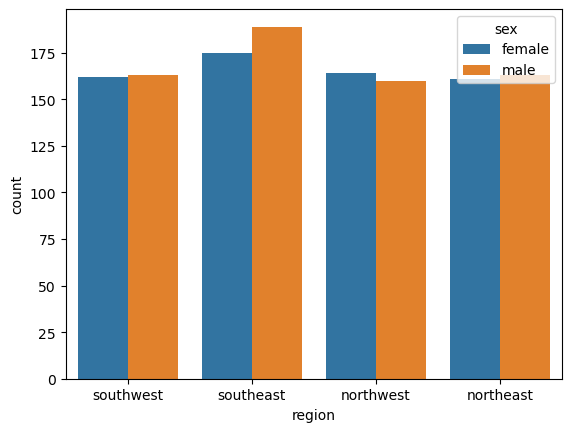

In [17]:
#Lets check how much male and how much female from all 4 location
sns.countplot(x='region',data=data,hue='sex')
plt.show()

So here we can see that from ,

SouthWest - Female is 162 and Male is 165

SouthEast - Female is 175 and Male is almost 185


NorthWest -Female is almost 168 and Male is almost 160


North east -  Female is almost almost 160 and Male is almost 168

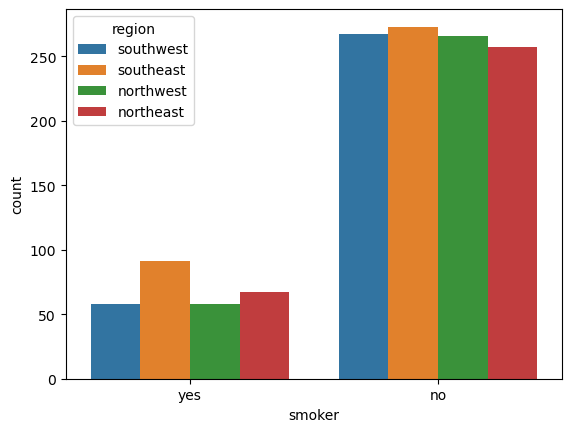

In [18]:
#Lets check how much smoker from which part of USA
sns.countplot(x='smoker',data=data,hue='region')
plt.show()

From Southwest from USA only almost 60 person  are smoker

From Southwest from USA more then 250 person  are Non smoker

From SouthEast from USA only almost 90 person  are smoker


From SouthEast from USA more then 250 person  are Non smoker


From NorthWest from USA only almost 60 person are smoker


From NorthWest from USA more then 250 person  are Non smoker



From NorthEast from USA more then almost 70 person are smoker


From NorthEast from USA more then 250 person  are Non smoker




So, here we observe that  number of people are smoker in 4 region in USA 


# Count of Smokers by Sex and Region

In [19]:
import warnings
warnings.filterwarnings('ignore')
data.groupby(['region'])['smoker','sex'].value_counts()


region     smoker  sex   
northeast  no      female    132
                   male      125
           yes     male       38
                   female     29
northwest  no      female    135
                   male      131
           yes     female     29
                   male       29
southeast  no      female    139
                   male      134
           yes     male       55
                   female     36
southwest  no      female    141
                   male      126
           yes     male       37
                   female     21
dtype: int64

So we get almost same as what we see in the previous code.

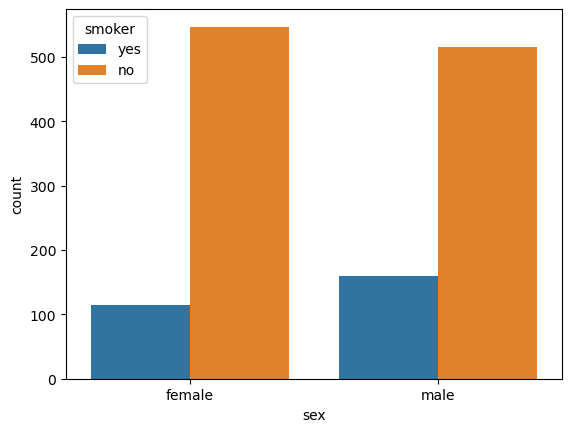

In [20]:
#Lets check how much male and female are smoker

sns.countplot(x='sex',data=data,hue='smoker')
plt.show()

So ,here we can observe that 

Female - more 100 peoples are smoker  


Male - More then  peoples are smoker 

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

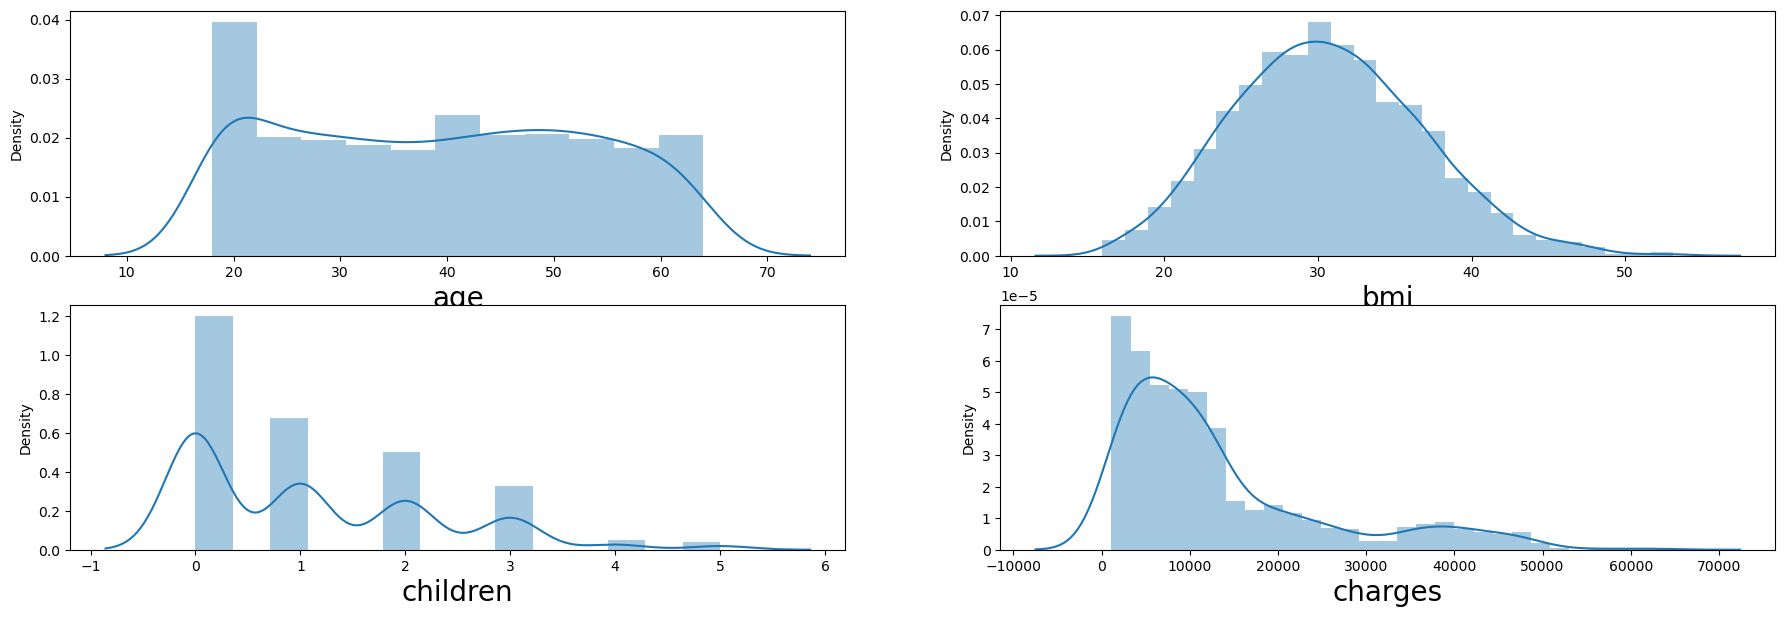

In [23]:
#Lets check the distribution of the columns
plt.figure(figsize=(22,7))
plotnumber=1
for column in data[['age','bmi','children','charges']]:#Here we taking only numerical data
    if plotnumber <=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

# Observation


Age - > Age is Little Bit Skewed

BMI -> BMI contains some outliers because we have the Normal BMI rate (using the ratio of height to weight, ideally 18.5 to 24.9)

Children -> 6 Children Is normal,  is little bit skewed


Chrages - > Charges is our target column.

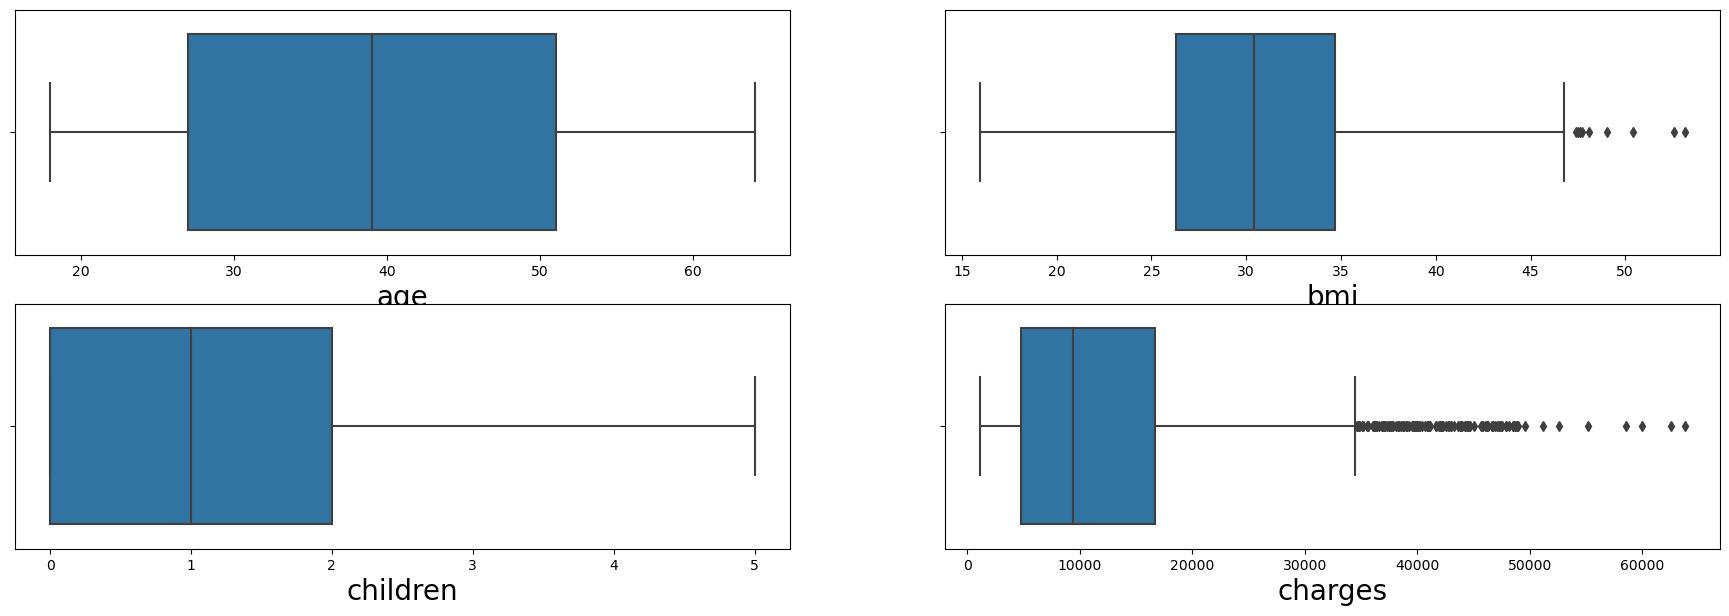

In [24]:
#Lets Plot BOX plot and Check Outliers by visualization
#Lets check the distribution of the columns
plt.figure(figsize=(22,7))
plotnumber=1
for column in data[['age','bmi','children','charges']]:#Here we taking only numerical data
    if plotnumber <=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

Observation

Here we can clearly see that . BMI has some outliers . We have to fix them.

# First we have to check correlatiom before losing any data because we have small dataset .

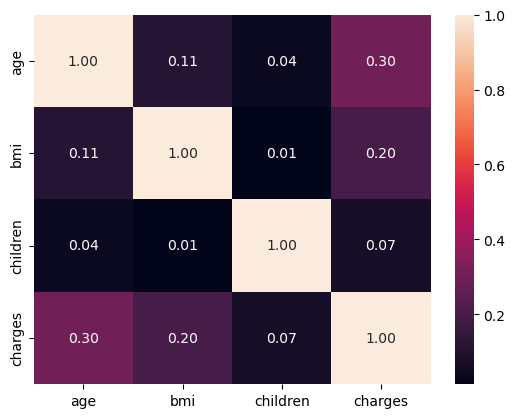

In [25]:
sns.heatmap(data.corr(),annot=True,fmt='.2f',)
plt.show()

# Observations

1 - BMI have almost 20% relationship with charges

2- Age have almost 30%  relationship with charges

2 -Childres have almost 7% relationship with charges

In [26]:
#Lets check correlation with target columns
data.corr()['charges']

age         0.298308
bmi         0.198401
children    0.067389
charges     1.000000
Name: charges, dtype: float64

As we seen before this code . almost same we get not.

# Data Preprocessing

In [27]:
#Lets use encoding technique and convert all categorical data to numerical data
#First filter categorical column
numeric=['int8','int16','int32','int64','float','float32','float64']
categorical_column=[]
feature=data.columns.values.tolist()

for col in feature:
    if data[col].dtype in numeric:
        continue
    categorical_column.append(col)
categorical_column

['sex', 'smoker', 'region']

In [28]:
df_dummies=pd.get_dummies(data[categorical_column],drop_first=True)
df_dummies.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0


So , Here we have to Encode Sex , Smoker and Region. using pd.get_dummies.

In [29]:
#Lets join with DataFrame
data=data.join(df_dummies)


In [30]:
#Lets check
data.head()

,age,sex,bmi,children,smoker,region,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0


In [31]:
#Lets drop unwanted column (Like categorical column)
data.drop(columns=categorical_column,axis=1,inplace=True)

In [32]:
#Lets check columns are deleted or not
print(data.shape)
data.head()

(1337, 9)


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


Now we completed Encoding Part and Visualization part 



# Lets Handle the Outlies By using Zscore

We see above, only BMI column contains outliers .lets check again


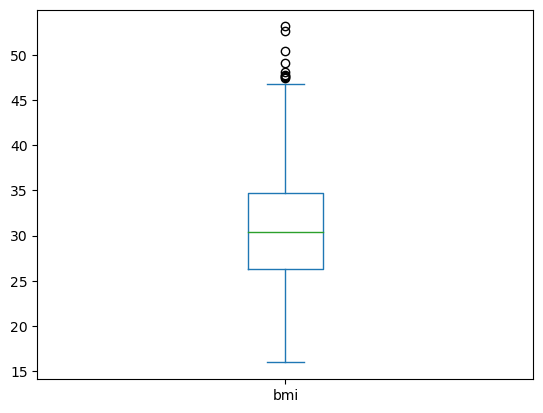

In [33]:
#Lets plot agian BMI
data['bmi'].plot.box()
plt.show()

We can . Clearly see that there is outliers we have to treat that. using zscore

In [34]:
data.shape

(1337, 9)

In [35]:
#Lets import zscore
import numpy as np
from scipy.stats import zscore
z_score=zscore(data[['bmi']])
abs_score=np.abs(z_score)
filtering_entry=(abs_score<3).all(axis=1)
data=data[filtering_entry]
data.describe()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000,1333.000000
mean,39.249062,30.601564,1.097524,13274.344476,0.503376,0.204801,0.243061,0.270068,0.243811
std,14.028963,6.003179,1.206626,12090.004775,0.500176,0.403708,0.429092,0.444161,0.429541
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.220000,0.000000,4747.052900,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.305000,1.000000,9386.161300,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.600000,2.000000,16657.717450,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,48.070000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
data.shape

(1333, 9)

# Check How Much Data Loss

In [37]:
data_loss=((1337-1333)/1337)*100
data_loss

0.2991772625280479

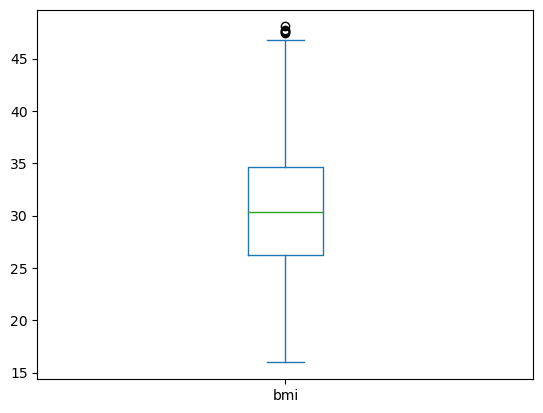

In [38]:
#Lets plot agian BMI
data['bmi'].plot.box()
plt.show()

So here we can see that we deleted 4 records from our bmi 

# Dividing data in feature and vectors

In [39]:
x=data.drop(columns='charges')#Feature
y=data.charges#Target

In [40]:
x.skew()

age                 0.052714
bmi                 0.205541
children            0.934451
sex_male           -0.013519
smoker_yes          1.464636
region_northwest    1.199393
region_southeast    1.036912
region_southwest    1.194642
dtype: float64

Here we can set threshold for +\-0.5. and we found as Age and Childres not come in our Threshold . So we decided to remove the skewness using Standard Scaler

In [41]:
from sklearn.preprocessing import PowerTransformer

In [42]:
scaler = PowerTransformer()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.528726,-0.414363,-1.075975,-1.006775,1.970478,-0.566666,-0.608268,1.761119
1,-1.620462,0.558170,0.297172,0.993271,-0.507491,-0.566666,1.644013,-0.567821
2,-0.768151,0.435098,1.365704,0.993271,-0.507491,-0.566666,1.644013,-0.567821
3,-0.384232,-1.353124,-1.075975,0.993271,-0.507491,1.764709,-0.608268,-0.567821
4,-0.459239,-0.246151,-1.075975,0.993271,-0.507491,1.764709,-0.608268,-0.567821
...,...,...,...,...,...,...,...,...
1328,0.786870,0.104422,1.365704,0.993271,-0.507491,1.764709,-0.608268,-0.567821
1329,-1.620462,0.260323,-1.075975,-1.006775,-0.507491,-0.566666,-0.608268,-0.567821
1330,-1.620462,1.038523,-1.075975,-1.006775,-0.507491,-0.566666,1.644013,-0.567821
1331,-1.350219,-0.783779,-1.075975,-1.006775,-0.507491,-0.566666,-0.608268,1.761119


Here we removed all the skewness. and we Normalize the data

# Lets Standardize the feature data


In [43]:
#Lets import standardscaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-1.52872596, -0.41436254, -1.0759755 , ..., -0.5666657 ,
        -0.6082678 ,  1.76111853],
       [-1.62046185,  0.5581704 ,  0.2971715 , ..., -0.5666657 ,
         1.64401271, -0.56782095],
       [-0.76815101,  0.43509777,  1.36570352, ..., -0.5666657 ,
         1.64401271, -0.56782095],
       ...,
       [-1.62046185,  1.0385231 , -1.0759755 , ..., -0.5666657 ,
         1.64401271, -0.56782095],
       [-1.35021863, -0.78377912, -1.0759755 , ..., -0.5666657 ,
        -0.6082678 ,  1.76111853],
       [ 1.46668187, -0.21383012, -1.0759755 , ...,  1.76470891,
        -0.6082678 , -0.56782095]])

# Now use VIF for checking multicollinearity problem

VIF - > Variance Inflation Factor

In [44]:
#Lets import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['feature']=x.columns

In [45]:
#Lets check how lookinf VIF score
vif

,vif,feature
0,1.021824,age
1,1.099451,bmi
2,1.007307,children
3,1.008126,sex_male
4,1.012206,smoker_yes
5,1.517010,region_northwest
6,1.638514,region_southeast
7,1.528340,region_southwest


In VIF we consider threshold 5 VIF Score . if any feature is greater then 5 VIF Score it means it contains multicollinearity problmem/


So in our dataset  no feature have more then 5 vif score . so it means out dataset is not contain any multicollinearity problem.

# Model Building

In [46]:
#Lets Build a Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

In [47]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 200):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.8972822090183997 on Random State 94


In [48]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=94)

In [49]:
regressors = {
    
    'Random Forest' : RandomForestRegressor(),
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [50]:
results

,MAE,MSE,RMSE,R2-score
Random Forest,2363.828,1.564928e+07,3955.917519,0.897


# Cross - Validation of the model

In [51]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
lss  = r2_score(y_test,y_pred)

In [52]:
for j in range(22,30):
    isscore = cross_val_score(rf,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 22
Cross validation score is:- 81.69224624475032
accuracy_score is:- 89.78346431343037


At cv:- 23
Cross validation score is:- 81.84098431017894
accuracy_score is:- 89.78346431343037


At cv:- 24
Cross validation score is:- 82.35026354255952
accuracy_score is:- 89.78346431343037


At cv:- 25
Cross validation score is:- 82.14869570994766
accuracy_score is:- 89.78346431343037


At cv:- 26
Cross validation score is:- 82.29609322533487
accuracy_score is:- 89.78346431343037


At cv:- 27
Cross validation score is:- 82.07096219959263
accuracy_score is:- 89.78346431343037


At cv:- 28
Cross validation score is:- 81.27234496831096
accuracy_score is:- 89.78346431343037


At cv:- 29
Cross validation score is:- 82.34245718215367
accuracy_score is:- 89.78346431343037




In [64]:
lsscore_selected = cross_val_score(rf,x,y,cv=22).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.8197531289512127 
The accuracy score is:  0.9165863905780187


# Gradient Boosting Regressor

In [103]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 100):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    gbr = GradientBoostingRegressor()
    gbr.fit(X_train, y_train)
    pred = gbr.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

In [104]:
print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.9165863905780187 on Random State 94


In [109]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=94)

In [110]:
regressors = {
    
    'Gradient Boost Regressor' : GradientBoostingRegressor(),
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [111]:
results

,MAE,MSE,RMSE,R2-score
Gradient Boost Regressor,2221.579,12617018.64,3552.04429,0.917


# Cross-validation of the model

In [112]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)
from sklearn.model_selection import cross_val_score
lss  = r2_score(y_test,y_pred)

In [113]:
for j in range(20,30):
    isscore = cross_val_score(gbr,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 20
Cross validation score is:- 85.07543381780906
accuracy_score is:- 91.68512369243824


At cv:- 21
Cross validation score is:- 84.56185113776888
accuracy_score is:- 91.68512369243824


At cv:- 22
Cross validation score is:- 84.13779396292078
accuracy_score is:- 91.68512369243824


At cv:- 23
Cross validation score is:- 84.33022430213093
accuracy_score is:- 91.68512369243824


At cv:- 24
Cross validation score is:- 84.78585715077246
accuracy_score is:- 91.68512369243824


At cv:- 25
Cross validation score is:- 84.51991574322636
accuracy_score is:- 91.68512369243824


At cv:- 26
Cross validation score is:- 84.72110401411447
accuracy_score is:- 91.68512369243824


At cv:- 27
Cross validation score is:- 84.63777212508865
accuracy_score is:- 91.68512369243824


At cv:- 28
Cross validation score is:- 83.71740220081224
accuracy_score is:- 91.68512369243824


At cv:- 29
Cross validation score is:- 84.68962819839103
accuracy_score is:- 91.68512369243824




In [114]:
lsscore_selected = cross_val_score(gbr,x,y,cv=26).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.8471978817937209 
The accuracy score is:  0.9168512369243824


# KNeighbors Regressor

In [74]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(100, 200):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.8407623514550446 on Random State 164


In [75]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=164)

In [76]:
regressors = {
    
    'KNN Regressor': KNeighborsRegressor()
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [77]:
results

,MAE,MSE,RMSE,R2-score
KNN Regressor,3040.9,2.641417e+07,5139.471912,0.841


# XGBRegressor

In [86]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(0, 100):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    xgb = XGBRegressor()
    xgb.fit(X_train, y_train)
    pred = xgb.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.8844563091647251 on Random State 94


In [87]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=94)

In [88]:
regressors = {
    
    'XG Boost Regressor' : XGBRegressor()
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [89]:
results

,MAE,MSE,RMSE,R2-score
XG Boost Regressor,2568.913,1.748359e+07,4181.338259,0.884


# Cross-validation of the model

In [90]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)
lss  = r2_score(y_test,y_pred)

In [91]:
for j in range(10,20):
    isscore = cross_val_score(xgb,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 10
Cross validation score is:- 80.4793313089211
accuracy_score is:- 88.44563091647251


At cv:- 11
Cross validation score is:- 80.11111562272866
accuracy_score is:- 88.44563091647251


At cv:- 12
Cross validation score is:- 79.79450105662268
accuracy_score is:- 88.44563091647251


At cv:- 13
Cross validation score is:- 80.64362997580041
accuracy_score is:- 88.44563091647251


At cv:- 14
Cross validation score is:- 80.0428037621537
accuracy_score is:- 88.44563091647251


At cv:- 15
Cross validation score is:- 80.37854969924479
accuracy_score is:- 88.44563091647251


At cv:- 16
Cross validation score is:- 79.80519784229699
accuracy_score is:- 88.44563091647251


At cv:- 17
Cross validation score is:- 80.12359518759438
accuracy_score is:- 88.44563091647251


At cv:- 18
Cross validation score is:- 79.53020540097431
accuracy_score is:- 88.44563091647251


At cv:- 19
Cross validation score is:- 80.04943033799442
accuracy_score is:- 88.44563091647251




In [92]:
from sklearn.model_selection import cross_val_score
lsscore_selected = cross_val_score(xgb,x,y,cv=13).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.8064362997580041 
The accuracy score is:  0.8844563091647251


# Hyper parameter tuning

Here we select Gradient Boost Classifier For Tune The paramete

In [115]:
lsscore_selected = cross_val_score(gbr,x,y,cv=26).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.8472336881579222 
The accuracy score is:  0.9168512369243824


In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
results

,MAE,MSE,RMSE,R2-score
Gradient Boost Regressor,2221.579,12617018.64,3552.04429,0.917


In [140]:
gbr=GradientBoostingRegressor()

In [141]:
parameters = {'n_estimators' : [100,200 ],
              
             'max_depth':range(4,8),
             'learning_rate':[0.1,0.3],
              'min_samples_split':range(4,8)
             }

In [142]:
grd = GridSearchCV(gbr,param_grid = parameters)
grd.fit(X_train,y_train)

print('Best Params ',grd.best_params_)

Best Params  {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 100}


In [146]:
gbr = XGBRegressor(learning_rate= 0.1, max_depth= 4, min_samples_leaf= 5, n_estimators= 100,min_samples_split=4)

gbr.fit(X_train,y_train)

pred = gbr.predict(X_test)

r2_score(y_test,pred)

[15:08:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



0.9179376704479705

# Plot Actual VS Predicted

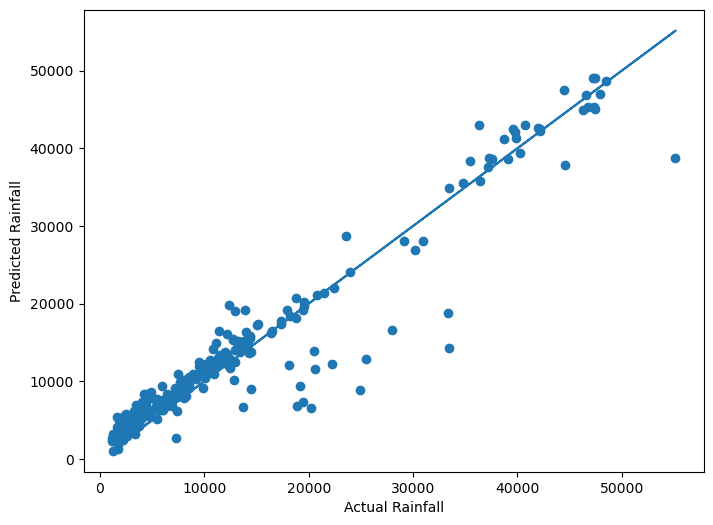

In [147]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred)
plt.plot(y_test,y_test)
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.show()

So, Here we can see that we cover maximum data points near best fit line. 

# Conclusion

In [152]:
import pickle
filename=('Medical Insurence')
pickle.dump(gbr,open(filename,'wb'))

In [153]:
loaded_model=pickle.load(open('Medical Insurence','rb'))
result=loaded_model.score(X_test,y_test)
print(result*100)

91.79376704479705


In [156]:
conclusion=pd.DataFrame([loaded_model.predict(X_train)[:],pred[:]],index=['predicted','original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065
predicted,1791.409058,4460.409668,13653.454102,2898.997559,6040.553223,5404.845703,13909.916992,10289.632812,17993.220703,17026.859375,...,2356.369141,8249.790039,14605.114258,5881.732422,2588.614014,27270.748047,8474.364258,12601.697266,9362.220703,10173.628906
original,9562.411133,6803.056152,16571.714844,35551.917969,38658.457031,9194.378906,16093.105469,49071.929688,41201.750000,8930.976562,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Student of DataScience
#Student of DataTrained- Saurav
#Date-19-10-22
#Time - 21:12